In [6]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

#Leer Base de datos    
ratios_comb = pd.read_excel('Reporte_Ratio_Combinado_Por_Aseguradora.xlsx')
ratios_comb

#Leer Base de datos    
primas_si =pd.read_excel('Reporte_Primas_Y_Siniestros_Por_Categoria.xlsx')

nombre_actual = primas_si.columns[4]

# Cambiar el nombre de la columna en la posición 4
nuevo_nombre = 'Categoria'
primas_si.rename(columns={nombre_actual: nuevo_nombre}, inplace=True)

nombre_actual = primas_si.columns[3]
# Cambiar el nombre de la columna en la posición 3
nuevo_nombre = 'Clasificacion'
primas_si.rename(columns={nombre_actual: nuevo_nombre}, inplace=True)

# Mapear los nombres de los meses en español a números de mes
meses = {
    'Enero': '01',
    'Febrero': '02',
    'Marzo': '03',
    'Abril': '04',
    'Mayo': '05',
    'Junio': '06',
    'Julio': '07',
    'Agosto': '08',
    'Setiembre': '09',
    'Octubre': '10',
    'Noviembre': '11',
    'Diciembre': '12'
}

# Convertir el mes en formato numérico
primas_si['mes_numero'] = primas_si['Mes'].map(meses)

# Crear la columna "fecha" combinando las columnas "año" y "mes_numero"
primas_si['fecha'] = primas_si['Año'].astype(str) + '-' + primas_si['mes_numero']
primas_si=primas_si[primas_si['Año']!=2015]
primas_si=primas_si[primas_si['Año']!=2016]
primas_si=primas_si[primas_si['Año']!=2017]
primas_si=primas_si[primas_si['Año']!=2018]

primas_si

,Año,Mes,Aseguradora,Clasificacion,Categoria,Monto,mes_numero,fecha
1822,2019,Enero,INS,Primas,Generales,81181.719533,01,2019-01
1823,2019,Enero,INS,Primas,Personales,63141.613458,01,2019-01
1824,2019,Enero,INS,Siniestros,Generales,10773.054972,01,2019-01
1825,2019,Enero,INS,Siniestros,Personales,12684.927276,01,2019-01
1826,2019,Enero,MAGIST,Primas,Personales,263.079431,01,2019-01
...,...,...,...,...,...,...,...,...
3767,2023,Febrero,OCEANICA,Siniestros,Generales,770.607336,02,2023-02
3768,2023,Febrero,LAFISE,Primas,Generales,1814.860558,02,2023-02
3769,2023,Febrero,LAFISE,Primas,Personales,4.981774,02,2023-02
3770,2023,Febrero,LAFISE,Siniestros,Generales,615.050863,02,2023-02


In [7]:
#Sacar Sinistralidad de Seguros Personales
primas_siPers = primas_si[primas_si['Categoria']=='Personales']
primas_siPers

primas = primas_siPers[primas_siPers['Clasificacion'] == 'Primas']

# Filtrar las filas correspondientes a siniestros
siniestros = primas_siPers[primas_siPers['Clasificacion'] == 'Siniestros']

# Realizar un merge basado en las columnas 'Año' y 'Mes'
primas_siPers1 = pd.merge(primas, siniestros, on=['Año', 'Mes','Aseguradora','fecha'], suffixes=('_primas', '_siniestros'))

primas_siPers1

# Calcular la relación primas/siniestros para cada año y mes
primas_siPers1['Siniestralidad'] = primas_siPers1['Monto_siniestros'] / primas_siPers1['Monto_primas']


primas_siPers1

,Año,Mes,Aseguradora,Clasificacion_primas,Categoria_primas,Monto_primas,mes_numero_primas,fecha,Clasificacion_siniestros,Categoria_siniestros,Monto_siniestros,mes_numero_siniestros,Siniestralidad
0,2019,Enero,INS,Primas,Personales,63141.613458,01,2019-01,Siniestros,Personales,12684.927276,01,0.200896
1,2019,Enero,MAGIST,Primas,Personales,263.079431,01,2019-01,Siniestros,Personales,390.399459,01,1.483960
2,2019,Enero,MAPFRE,Primas,Personales,241.472441,01,2019-01,Siniestros,Personales,283.205304,01,1.172827
3,2019,Enero,ASSA,Primas,Personales,2394.864037,01,2019-01,Siniestros,Personales,315.274603,01,0.131646
4,2019,Enero,PANAM,Primas,Personales,13816.950945,01,2019-01,Siniestros,Personales,2060.548615,01,0.149132
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2023,Febrero,ADISA,Primas,Personales,3610.947410,02,2023-02,Siniestros,Personales,902.868490,02,0.250036
498,2023,Febrero,DAVIVIENDA,Primas,Personales,225.390833,02,2023-02,Siniestros,Personales,108.908250,02,0.483197
499,2023,Febrero,BMI,Primas,Personales,2276.331324,02,2023-02,Siniestros,Personales,1035.989433,02,0.455114
500,2023,Febrero,SAGICOR,Primas,Personales,1719.922057,02,2023-02,Siniestros,Personales,178.723893,02,0.103914


In [8]:
#Sacar Sinistralidad de Seguros Generales
primas_siGen = primas_si[primas_si['Categoria']=='Generales']
primas_siGen

primas = primas_siGen[primas_siGen['Clasificacion'] == 'Primas']

# Filtrar las filas correspondientes a siniestros
siniestros = primas_siGen[primas_siGen['Clasificacion'] == 'Siniestros']

# Realizar un merge basado en las columnas 'Año' y 'Mes'
primas_siGen1 = pd.merge(primas, siniestros, on=['Año', 'Mes','Aseguradora','fecha'], suffixes=('_primas', '_siniestros'))

primas_siGen1

# Calcular la relación primas/siniestros para cada año y mes
primas_siGen1['Siniestralidad'] = primas_siGen1['Monto_siniestros'] / primas_siGen1['Monto_primas']

primas_siGen1

,Año,Mes,Aseguradora,Clasificacion_primas,Categoria_primas,Monto_primas,mes_numero_primas,fecha,Clasificacion_siniestros,Categoria_siniestros,Monto_siniestros,mes_numero_siniestros,Siniestralidad
0,2019,Enero,INS,Primas,Generales,81181.719533,01,2019-01,Siniestros,Generales,10773.054972,01,0.132703
1,2019,Enero,MAPFRE,Primas,Generales,531.588115,01,2019-01,Siniestros,Generales,83.562074,01,0.157193
2,2019,Enero,ASSA,Primas,Generales,3922.856863,01,2019-01,Siniestros,Generales,434.224921,01,0.110691
3,2019,Enero,ADISA,Primas,Generales,168.600419,01,2019-01,Siniestros,Generales,134.200967,01,0.795971
4,2019,Enero,DAVIVIENDA,Primas,Generales,-23.911975,01,2019-01,Siniestros,Generales,87.599421,01,-3.663412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,2023,Febrero,DAVIVIENDA,Primas,Generales,229.580913,02,2023-02,Siniestros,Generales,92.646464,02,0.403546
469,2023,Febrero,QUALITAS,Primas,Generales,6065.986811,02,2023-02,Siniestros,Generales,2175.205675,02,0.358591
470,2023,Febrero,SAGICOR,Primas,Generales,381.002673,02,2023-02,Siniestros,Generales,188.280948,02,0.494172
471,2023,Febrero,OCEANICA,Primas,Generales,2526.247114,02,2023-02,Siniestros,Generales,770.607336,02,0.305040


/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_73422/81143521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_PersINS["Siniestralidad%"]=primas_PersINS['Siniestralidad']*100
/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_73422/81143521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_PersINS['fecha'] = pd.to_datetime(primas_PersINS['fecha'])
/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_73422/81143521.py:9: SettingWithCopyWarning: 
A value is trying 

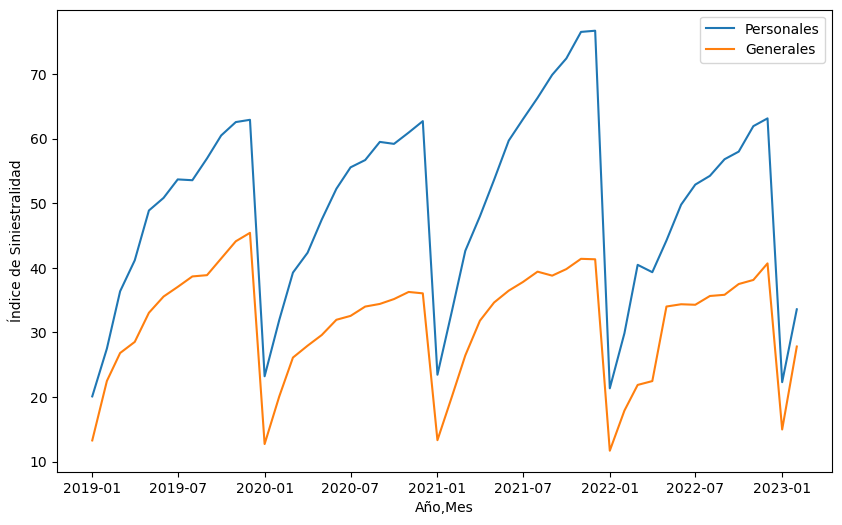

In [18]:
#Filtrar información para personales INS
primas_PersINS = primas_siPers1[primas_siPers1['Aseguradora'] == 'INS']
primas_PersINS["Siniestralidad%"]=primas_PersINS['Siniestralidad']*100
primas_PersINS['fecha'] = pd.to_datetime(primas_PersINS['fecha'])
primas_PersINS = primas_PersINS.sort_values('fecha')

#Filtrar información para personales INS
primas_GenINS = primas_siGen1[primas_siGen1['Aseguradora'] == 'INS']
primas_GenINS["Siniestralidad%"]=primas_GenINS['Siniestralidad']*100
primas_GenINS['fecha'] = pd.to_datetime(primas_GenINS['fecha'])
primas_GenINS = primas_GenINS.sort_values('fecha')


# Crear el gráfico de líneas con dos líneas correspondientes a los dataframes filtrados
plt.figure(figsize=(10,6))
plt.plot(primas_PersINS['fecha'], primas_PersINS['Siniestralidad%'], label='Personales')
plt.plot(primas_GenINS['fecha'], primas_GenINS['Siniestralidad%'], label='Generales')

# Personalizar el gráfico
#plt.title('Gráfico de Líneas para Aseguradora INS')
plt.xlabel('Año,Mes')
plt.ylabel('Índice de Siniestralidad')
plt.legend()


# Mostrar el gráfico
plt.savefig('siniestralidad_INS.pdf', format='pdf', bbox_inches='tight')
plt.show()


/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_73422/1342114086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_PersASSA["Siniestralidad%"]=primas_PersASSA['Siniestralidad']*100
/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_73422/1342114086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_PersASSA['fecha'] = pd.to_datetime(primas_PersASSA['fecha'])
/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_73422/1342114086.py:9: SettingWithCopyWarning: 
A value 

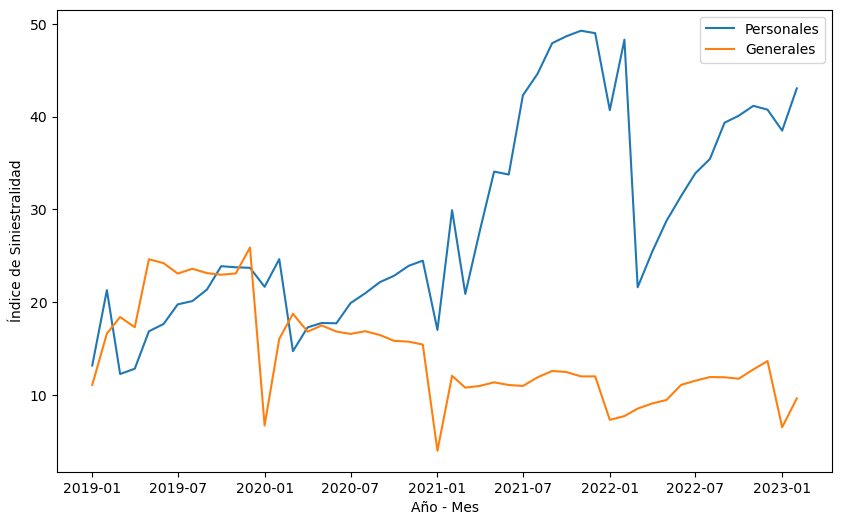

In [19]:
#Filtrar información para personales ASSA
primas_PersASSA = primas_siPers1[primas_siPers1['Aseguradora'] == 'ASSA']
primas_PersASSA["Siniestralidad%"]=primas_PersASSA['Siniestralidad']*100
primas_PersASSA['fecha'] = pd.to_datetime(primas_PersASSA['fecha'])
primas_PersASSA = primas_PersASSA.sort_values('fecha')

#Filtrar información para generales ASSA
primas_GenASSA = primas_siGen1[primas_siGen1['Aseguradora'] == 'ASSA']
primas_GenASSA["Siniestralidad%"]=primas_GenASSA['Siniestralidad']*100
primas_GenASSA['fecha'] = pd.to_datetime(primas_GenASSA['fecha'])

primas_GenASSA = primas_GenASSA.sort_values('fecha')


# Crear el gráfico de líneas con dos líneas correspondientes a los dataframes filtrados
plt.figure(figsize=(10,6))
plt.plot(primas_PersASSA['fecha'], primas_PersASSA['Siniestralidad%'], label='Personales')
plt.plot(primas_GenASSA['fecha'], primas_GenASSA['Siniestralidad%'], label='Generales')

# Personalizar el gráfico
#plt.title('Gráfico de Líneas para Aseguradora ASSA')
plt.xlabel('Año - Mes')
plt.ylabel('Índice de Siniestralidad')
plt.legend()

# Mostrar el gráfico
plt.savefig('siniestralidad_ASSA.pdf', format='pdf', bbox_inches='tight')
plt.show()



In [14]:
#Filtrar información para Qualitas solo seguros generales
primas_GenQUALITAS = primas_siGen1[primas_siGen1['Aseguradora'] == 'QUALITAS']
primas_GenQUALITAS["Siniestralidad%"]=primas_GenQUALITAS['Siniestralidad']*100
primas_GenQUALITAS['fecha'] = pd.to_datetime(primas_GenQUALITAS['fecha'])
primas_GenQUALITAS = primas_GenQUALITAS.sort_values('fecha')

#Filtrar información para PANAM solo seguros personales
primas_PersPANAM = primas_siPers1[primas_siPers1['Aseguradora'] == 'PANAM']
primas_PersPANAM["Siniestralidad%"]=primas_PersPANAM['Siniestralidad']*100
primas_PersPANAM['fecha'] = pd.to_datetime(primas_PersPANAM['fecha'])
primas_PersPANAM = primas_PersPANAM.sort_values('fecha')


/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_73422/2280663631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_GenQUALITAS["Siniestralidad%"]=primas_GenQUALITAS['Siniestralidad']*100
/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_73422/2280663631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_GenQUALITAS['fecha'] = pd.to_datetime(primas_GenQUALITAS['fecha'])
/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_73422/2280663631.py:9: SettingWithCopyWarnin

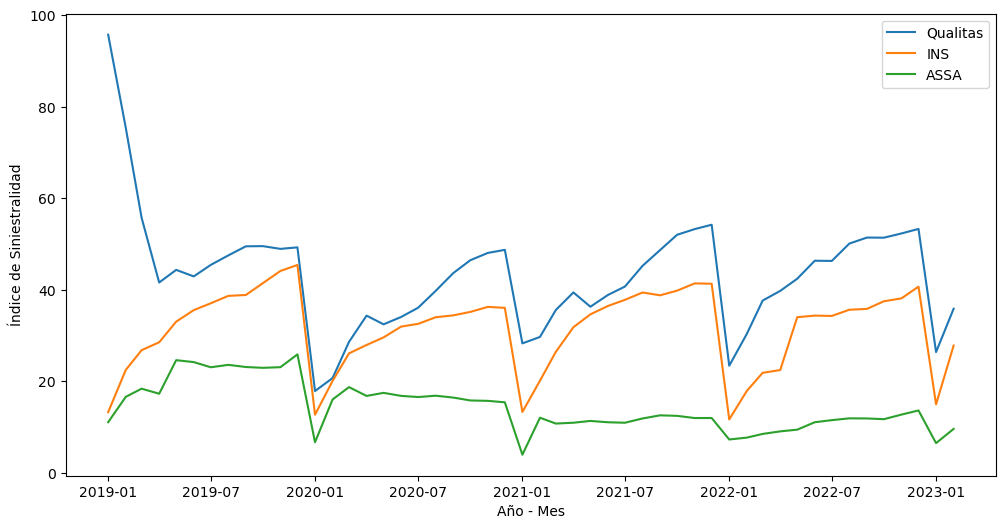

In [22]:
#Gráfico Índice de Siniestralidad Seguros Generales
plt.figure(figsize=(12, 6))
plt.plot(primas_GenQUALITAS['fecha'], primas_GenQUALITAS['Siniestralidad%'], label='Qualitas')
plt.plot(primas_GenINS['fecha'], primas_GenINS['Siniestralidad%'], label='INS')
plt.plot(primas_GenASSA['fecha'], primas_GenASSA['Siniestralidad%'], label='ASSA')

# Personalizar el gráfico
#plt.title('Índice de Siniestralidad Generales')
plt.xlabel('Año - Mes')
plt.ylabel('Índice de Siniestralidad')
plt.legend()
# Mostrar el gráfico
plt.savefig('siniestralidad_generales.pdf', format='pdf', bbox_inches='tight')
plt.show()


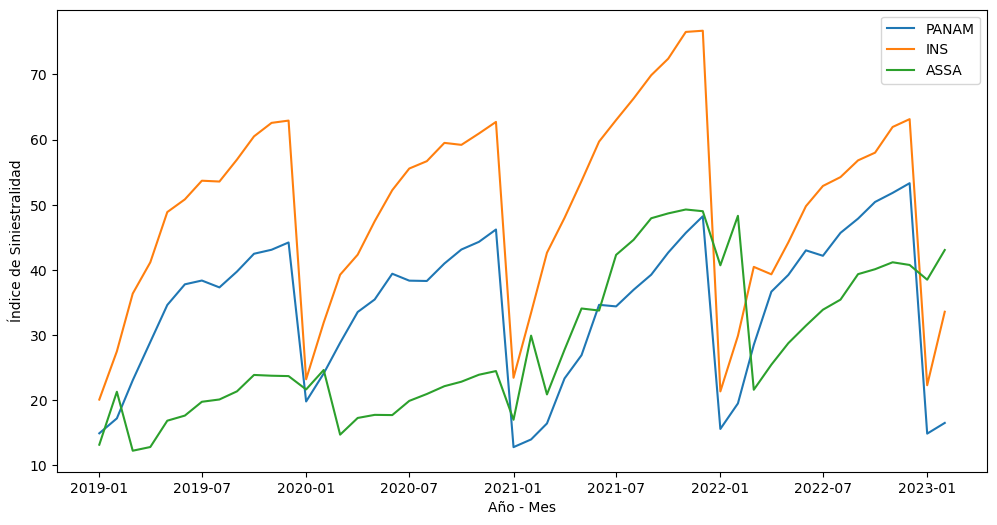

In [23]:
#Gráfico Índice de Siniestralidad Seguros Personales
plt.figure(figsize=(12, 6))
plt.plot(primas_PersPANAM['fecha'], primas_PersPANAM['Siniestralidad%'], label='PANAM')
plt.plot(primas_PersINS['fecha'], primas_PersINS['Siniestralidad%'], label='INS')
plt.plot(primas_PersASSA['fecha'], primas_PersASSA['Siniestralidad%'], label='ASSA')

# Personalizar el gráfico
#plt.title('Indice Siniestralidad Personales')
plt.xlabel('Año - Mes')
plt.ylabel('Índice de Siniestralidad')
plt.legend()
plt.savefig('siniestralidad_personales.pdf', format='pdf', bbox_inches='tight')
# Mostrar el gráfico
plt.show()


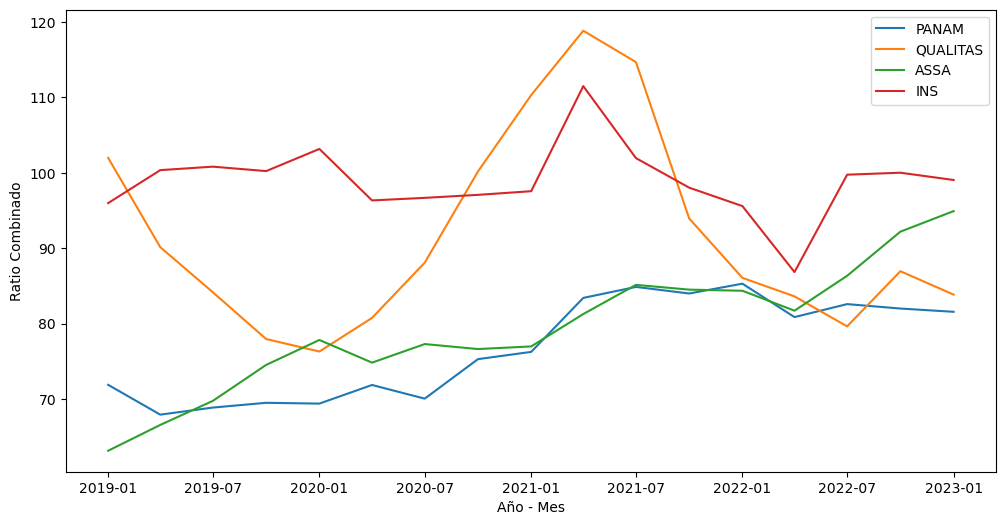

In [17]:
#Covertir periodo a formato fecha
def convertir_trimestre_a_fecha(trimestre):
    trimestre= trimestre.replace('I','1')
    trimestre_numero = int(trimestre.split('-')[0].replace('1V','10').replace('111', '7').replace('11','4'))
    anio = int(trimestre.split('-')[1])
    fecha = datetime(anio,trimestre_numero,1)
    return fecha

ratios_comb['Fecha'] = ratios_comb['Periodo'].apply(convertir_trimestre_a_fecha)
ratios_comb

#Separar las bases por aseguradora
ratios_INS=ratios_comb[ratios_comb['Aseguradora']=='INS']
ratios_INS = ratios_INS[ratios_INS['Fecha'].dt.year >= 2019]

ratios_ASSA=ratios_comb[ratios_comb['Aseguradora']=='ASSA']
ratios_ASSA = ratios_ASSA[ratios_ASSA['Fecha'].dt.year >= 2019]

ratios_QUALITAS=ratios_comb[ratios_comb['Aseguradora']=='QUALITAS']
ratios_QUALITAS = ratios_QUALITAS[ratios_QUALITAS['Fecha'].dt.year >= 2019]

ratios_PANAM=ratios_comb[ratios_comb['Aseguradora']=='PANAM']
ratios_PANAM = ratios_PANAM[ratios_PANAM['Fecha'].dt.year >= 2019]


plt.figure(figsize=(12, 6))
plt.plot(ratios_PANAM['Fecha'], ratios_PANAM['Ratio combinado'], label='PANAM')
plt.plot(ratios_QUALITAS['Fecha'], ratios_QUALITAS['Ratio combinado'], label='QUALITAS')
plt.plot(ratios_ASSA['Fecha'], ratios_ASSA['Ratio combinado'],label='ASSA')
plt.plot(ratios_INS['Fecha'], ratios_INS['Ratio combinado'], label='INS')

# Personalizar el gráfico
#plt.title('Gráfico de Ratio Combinado  2017-2023')
plt.xlabel('Año - Mes')
plt.ylabel('Ratio Combinado')
plt.legend()




# Mostrar el gráfico
plt.savefig('ratioCombinado_INS_ASSA_QUALI_PAN.pdf', format='pdf', bbox_inches='tight')
plt.show()

